**1.Perform an initial exploration of the power data and conduct a visual analysis.**


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager
import warnings
warnings.filterwarnings("ignore")
path = 'D:\PV_Power.xlsx'
plt.rcParams['axes.unicode_minus']=False

In [2]:
!pip install openpyxl


In [3]:
df = pd.read_excel(path,0)
df.head()

,PV ID,DateTime,Power,Weather Station ID,Total Irradiance,Normal Irradiance,Diffuse Irradiance,Air Temperature,Solar Panel Temperature,Humidity
0,1001,2019-06-01 00:00:00,0.0,104000001,0.0,0.0,0.0,21.08,19.53,88.10
1,1002,2019-06-01 00:00:00,0.0,104000002,0.0,0.0,0.0,20.90,0.00,86.50
2,1001,2019-06-01 01:00:00,0.0,104000001,0.0,0.0,0.0,21.52,19.84,80.52
3,1002,2019-06-01 01:00:00,0.0,104000002,0.0,0.0,0.0,20.30,0.00,90.50
4,1001,2019-06-01 02:00:00,0.0,104000001,0.0,0.0,0.0,20.97,19.30,85.68


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PV ID                    4048 non-null   int64         
 1   DateTime                 4048 non-null   datetime64[ns]
 2   Power                    3992 non-null   float64       
 3   Weather Station ID       4048 non-null   int64         
 4   Total Irradiance         4048 non-null   float64       
 5   Normal Irradiance        4048 non-null   float64       
 6   Diffuse Irradiance       4048 non-null   float64       
 7   Air Temperature          4048 non-null   float64       
 8   Solar Panel Temperature  4048 non-null   float64       
 9   Humidity                 4048 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 316.4 KB


In [5]:
df['PV ID'].unique()


array([1001, 1002], dtype=int64)

Text(0.5, 0, 'DateTime')

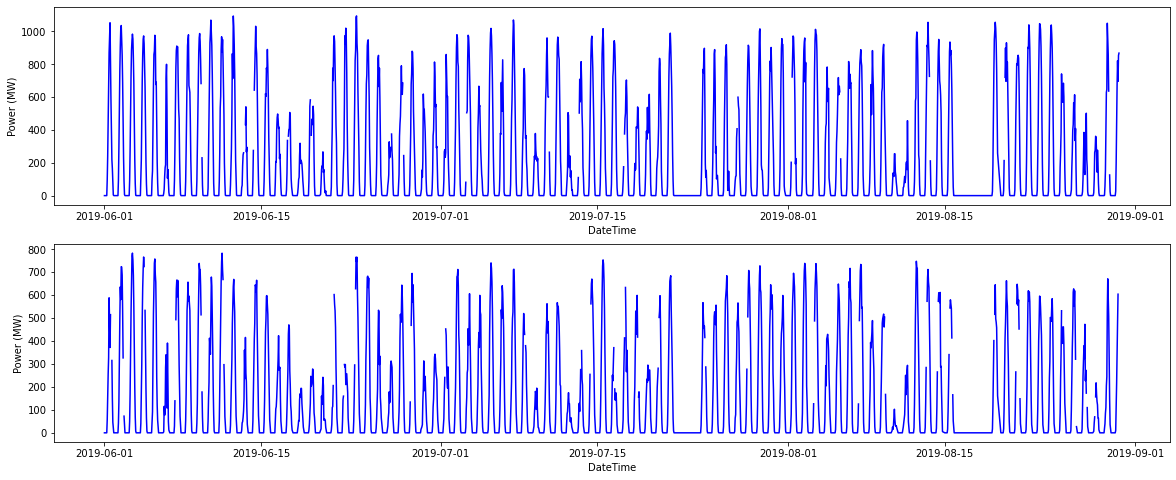

In [6]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the data of the two photovoltaic power plants separately
df_1001 = df[df['PV ID'] == 1001]
df_1002 = df[df['PV ID'] == 1002]

fig, axs = plt.subplots(2, 1, figsize=(20, 8), sharex=False)

# Plot the power of the first photovoltaic power plant
axs[0].plot(df_1001['DateTime'], df_1001['Power'], color='blue')
axs[0].set_ylabel('Power (MW)')
axs[0].set_xlabel('DateTime')

# Plot the power of the second photovoltaic power plant
axs[1].plot(df_1002['DateTime'], df_1002['Power'], color='blue')
axs[1].set_ylabel('Power (MW)')
axs[1].set_xlabel('DateTime')


From the chart, it can be observed that the output of the photovoltaic power plant exhibits a clear diurnal variation pattern.  
The power increases gradually in the morning, peaks at noon, decreases in the afternoon, and returns to zero at night. This fluctuation aligns with the natural principles of solar power generation, as the photovoltaic power plant's generation capacity mainly depends on solar irradiance, which is significantly influenced by sunlight duration. The following points can be concluded:

- **Obvious day-night fluctuation**: The power output displays a "mountain peak" shape every day, indicating significant output during the daytime, while output is almost zero at night.  
- **Noon peak**: Power reaches its peak around noon because solar irradiance is strongest at this time, resulting in maximum output from the photovoltaic power plant.  
- **Daytime curve similarity**: Although there are slight differences in daily power fluctuations, the overall trend remains consistent, showing a periodic variation pattern.  

### Zero Value Analysis  

In the photovoltaic power plant data, there are many instances where the power values are zero. The following analysis can be made:  

- **Nighttime zero values**: During nighttime hours, zero power values are normal because there is no sunlight, and the photovoltaic power plant cannot generate electricity. These zero values are considered normal.  
- **Daytime zero values**: If zero values occur during the daytime, especially around noon (when solar irradiance is strong), the cause needs to be further investigated. Such zero values may be due to equipment failures, data collection issues, or extreme weather conditions (e.g., heavily overcast skies).  
- **Need for data verification**: To determine the authenticity of zero values, it is ideal to reference corresponding weather data (e.g., whether rainy or cloudy conditions occurred) or equipment logs to confirm whether these zero values are anomalies.  

At present, nighttime zero values are considered normal, but daytime zero values require further investigation to confirm if they are abnormal.  

### Comment  

Now, focusing on a specific day with missing values, **June 14** is selected for observation.


Text(0.5, 0, 'DateTime')

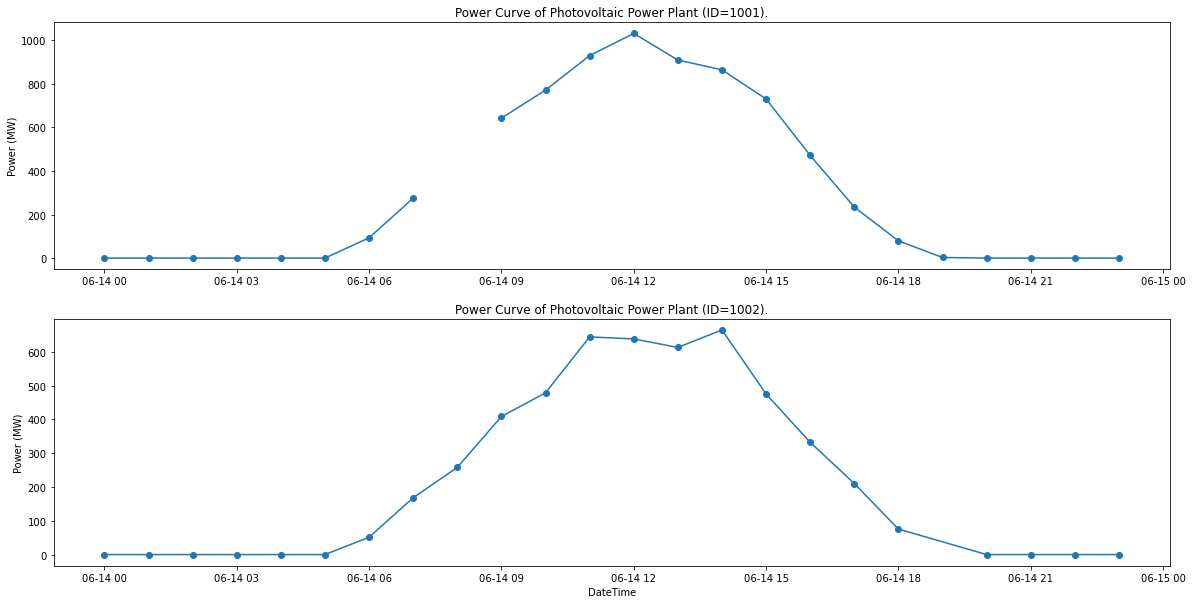

In [7]:
# Filter out the data for June 14
df_june_14 = df[(df['DateTime'].dt.month == 6) & (df['DateTime'].dt.day == 14)]


df_1001 = df_june_14[df_june_14['PV ID'] == 1001]
df_1002 = df_june_14[df_june_14['PV ID'] == 1002]


fig, axs = plt.subplots(2, 1, figsize=(20, 10))


axs[0].plot(df_1001['DateTime'], df_1001['Power'], marker='o')
axs[0].set_title('Power Curve of Photovoltaic Power Plant (ID=1001).')
axs[0].set_ylabel('Power (MW)')
    

axs[1].plot(df_1002['DateTime'], df_1002['Power'], marker='o')
axs[1].set_title('Power Curve of Photovoltaic Power Plant (ID=1002).')
axs[1].set_ylabel('Power (MW)')
axs[1].set_xlabel('DateTime')

**Based on the above chart, the following conclusions can be drawn:**

- **The power trend exhibits a typical solar irradiance curve**:  
  The power of the two photovoltaic power plants approaches zero in the early morning and evening, gradually increases in the morning, and peaks around noon (12 PM), then gradually decreases. This trend aligns with the daily variation of solar irradiance intensity, indicating that the power data has a certain level of reliability in the time series of the day, consistent with the normal power generation pattern of photovoltaic power plants.

- **Missing values affect data continuity**:  
  From the chart, it can be observed that power plants **1001** and **1002** may have missing power data at certain time points (i.e., no data points displayed). These missing data lead to discontinuities in the curve, especially for power plant **1001**, where significant breaks are evident in some time periods. This may be caused by equipment malfunctions, sensor anomalies, or interruptions during the data collection process. Further investigation and verification are needed to ensure data completeness and the reliability of the analysis results.


In [8]:
#Now let's overlay the data for each day to observe it together.
df['month'] = df['DateTime'].map(lambda x: x.month)
df['day'] = df['DateTime'].map(lambda x: x.day)
df['hour'] = df['DateTime'].map(lambda x: x.hour)
df.head()

,PV ID,DateTime,Power,Weather Station ID,Total Irradiance,Normal Irradiance,Diffuse Irradiance,Air Temperature,Solar Panel Temperature,Humidity,month,day,hour
0,1001,2019-06-01 00:00:00,0.0,104000001,0.0,0.0,0.0,21.08,19.53,88.10,6,1,0
1,1002,2019-06-01 00:00:00,0.0,104000002,0.0,0.0,0.0,20.90,0.00,86.50,6,1,0
2,1001,2019-06-01 01:00:00,0.0,104000001,0.0,0.0,0.0,21.52,19.84,80.52,6,1,1
3,1002,2019-06-01 01:00:00,0.0,104000002,0.0,0.0,0.0,20.30,0.00,90.50,6,1,1
4,1001,2019-06-01 02:00:00,0.0,104000001,0.0,0.0,0.0,20.97,19.30,85.68,6,1,2


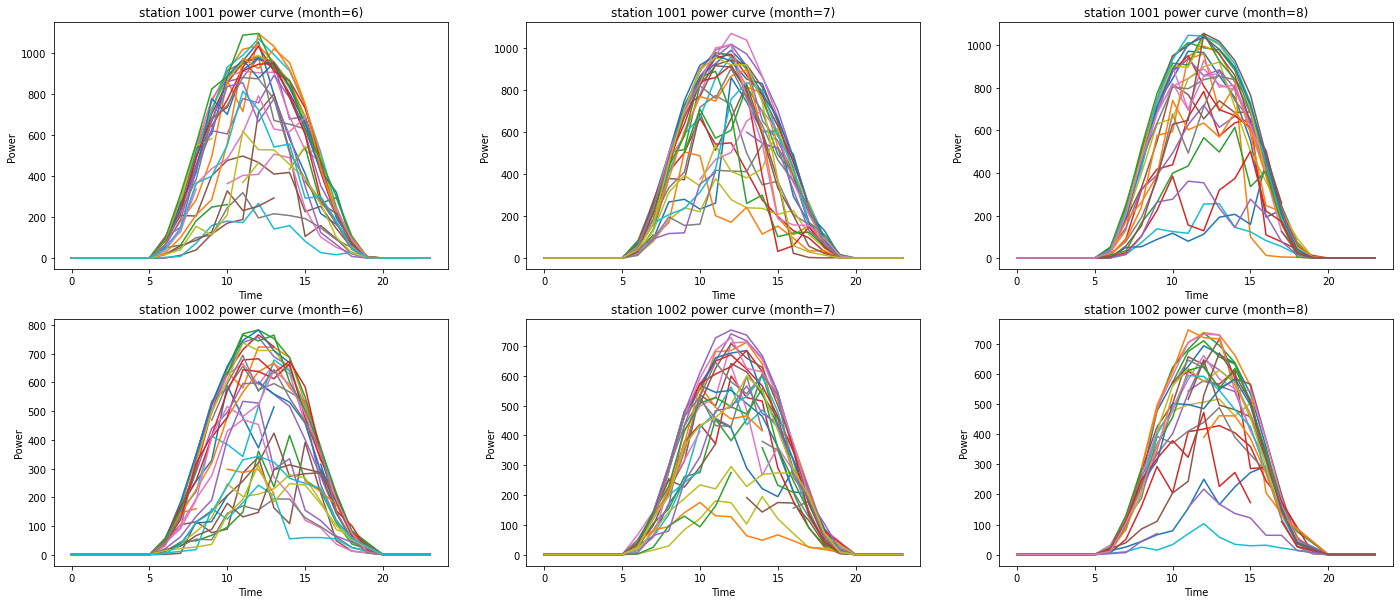

In [9]:
stations = [1001, 1002]
months = [6, 7, 8]

fig, axs = plt.subplots(len(stations), len(months), figsize=(24, 10))

# Generate power overlay charts for each photovoltaic power plant across different months.
for i, station in enumerate(stations):
    for j, month in enumerate(months):
        # Filter the data for a specific photovoltaic power plant and month
        df_station_month = df[(df['PV ID'] == station) & (df['month'] == month)]
        
        # Plot the power curves for different dates on a daily basis
        for day in df_station_month['day'].unique():
            df_day = df_station_month[df_station_month['day'] == day]
            axs[i, j].plot(df_day['hour'], df_day['Power'], label=f'Day {day}')
        
        # Set the titles and labels for the subplots
        axs[i, j].set_title(f'station {station} power curve (month={month})')
        axs[i, j].set_xlabel('Time')
        axs[i, j].set_ylabel('Power')

It can now be said that the photovoltaic power plants in **June to August** generally follow the typical daily trend observed on **June 15th**. When these curves are overlaid, there are no particularly abnormal situations.

**Overall conclusions**:

- Within a single day, there is a pattern where the power peaks at **noon**, and the values are zero between **0–5 AM** and **7–12 PM**.  
- Some days still show missing power values, but overall, the number of missing values is relatively small.  
- **Power Station 1001** has a maximum power of around **1000 MW**, while **Power Station 1002** has a maximum power of around **800 MW**.  
- For a dataset of approximately **4000 values**, losing **50 or so values** should not be a major issue. However, even so, caution is still required.


In [10]:
# Missing Value
dropped_count = len(df) - len(df.dropna(subset=['Power']))

# Missing Value Percentage
missing_percentage = (dropped_count / len(df)) * 100
missing_percentage


1.383399209486166

In [11]:
df.dropna(axis=0,inplace=True)


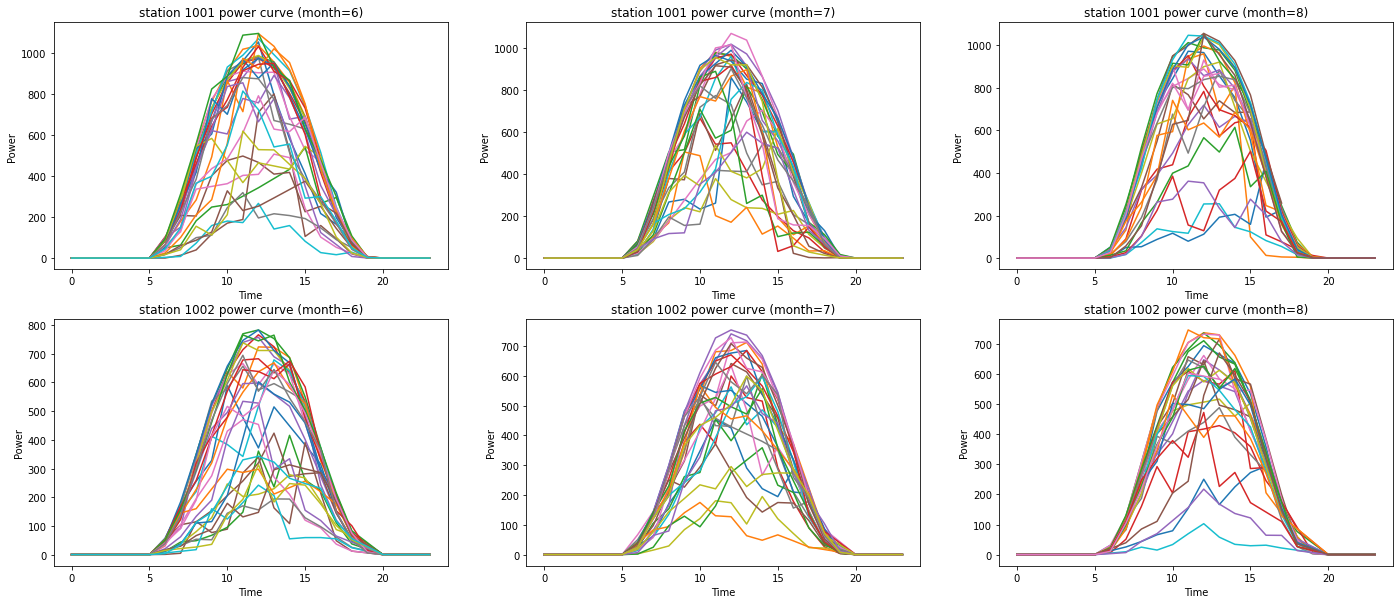

In [12]:
stations = [1001, 1002]
months = [6, 7, 8]

fig, axs = plt.subplots(len(stations), len(months), figsize=(24, 10))

# Generate power overlay charts for each photovoltaic power plant across different months.
for i, station in enumerate(stations):
    for j, month in enumerate(months):
        # Filter the data for a specific photovoltaic power plant and month
        df_station_month = df[(df['PV ID'] == station) & (df['month'] == month)]
        
        # Plot the power curves for different dates on a daily basis
        for day in df_station_month['day'].unique():
            df_day = df_station_month[df_station_month['day'] == day]
            axs[i, j].plot(df_day['hour'], df_day['Power'], label=f'Day {day}')
        
        # Set the titles and labels for the subplots
        axs[i, j].set_title(f'station {station} power curve (month={month})')
        axs[i, j].set_xlabel('Time')
        axs[i, j].set_ylabel('Power')

**2.Explore the climate characteristic data.**


Text(0.5, 0, 'DateTime')

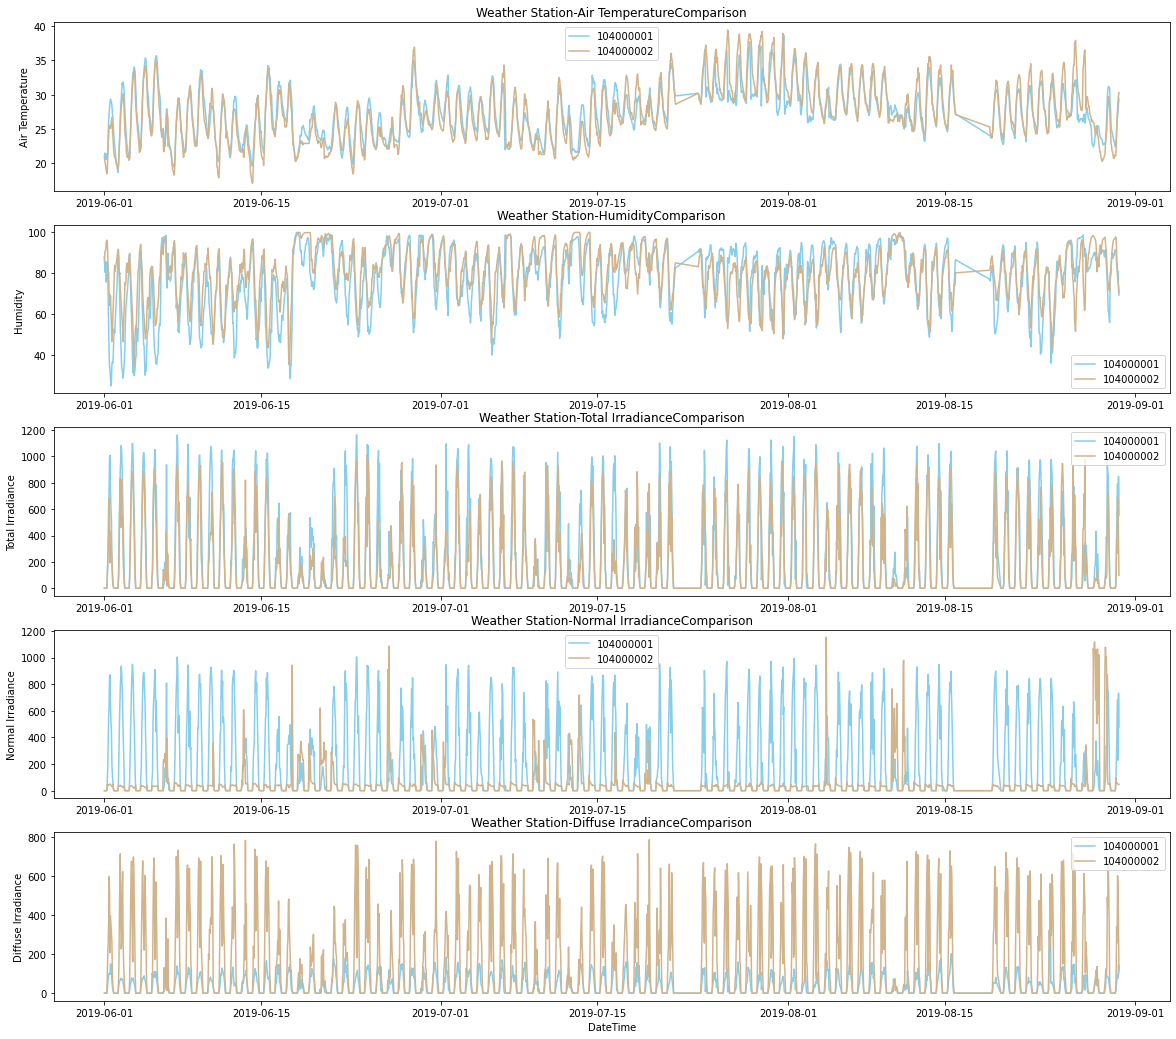

In [13]:
#1.First,let's compare the similarities and differences between the two photovoltaic power plants.

station_1001 = df[df['PV ID'] == 1001]
station_1002 = df[df['PV ID'] == 1002]

fig, axs = plt.subplots(5, 1, figsize=(20, 18))

# Feature List
features = ['Air Temperature', 'Humidity', 'Total Irradiance', 'Normal Irradiance', 'Diffuse Irradiance']
titles = ['Air Temperature', 'Humidity', 'Total Irradiance', 'Normal Irradiance', 'Diffuse Irradiance']

# Plot the time series for each feature.
for i, feature in enumerate(features):
    axs[i].plot(station_1001['DateTime'], station_1001[feature], label='104000001', color='skyblue')
    axs[i].plot(station_1002['DateTime'], station_1002[feature], label='104000002', color='tan')
    axs[i].set_title(f'Weather Station-{titles[i]}Comparison')
    axs[i].set_ylabel(titles[i])
    axs[i].legend()

plt.xlabel('DateTime')

### **1.Total Irradiance**  
- The total irradiance curves of the two photovoltaic power plants show a similar overall trend, but inconsistencies or abrupt changes may occur at certain time periods. For example, on sunny days, the total irradiance of both plants should reach similar peak values. However, in the actual data, one plant's values may appear abnormally lower or higher. This phenomenon could be caused by sensor faults, data collection delays, or obstructions.  
- Total irradiance should approach zero at night. If high values appear during nighttime periods, this indicates an anomaly in the data.  

---

### **2.Normal Irradiance**  
- Similar to total irradiance, the normal irradiance of the two photovoltaic power plants should exhibit similar trends. If one plant's data significantly deviates or fluctuates on certain days, it may indicate sensor or data recording issues at that site.  
- Under normal conditions, the normal irradiance values decrease rapidly during the early morning and evening, and they should be zero at night. If elevated values persist during these periods, this could indicate erroneous data.  

---

### **3.Air Temperature**  
- Air temperature between the two sites typically does not differ much unless the geographical location and environmental conditions are significantly different. If there are significant differences in temperature data (e.g., differences exceeding 10°C) at similar times, it could suggest a fault in one site's temperature sensor.  
- Similarly, the temperature curve should show a regular fluctuation over time, with higher temperatures during the day and lower temperatures at night. If the curve is smooth or lacks expected fluctuations, the data recording may be faulty.  

---

### **4.Humidity**  
- Humidity typically fluctuates with environmental changes between day and night. The humidity data for the two photovoltaic power plants should exhibit similar trends. If the humidity at one site remains abnormally high or low for an extended period, this may indicate a failure of the humidity sensor or missing data.  
- If humidity data shows sudden and unreasonable spikes or drops (e.g., dropping from 80% to 20%), it could point to a temporary fault during the data collection process.  

---

### **5.Diffuse Irradiance**  
- Diffuse irradiance shows significant variations between sunny and cloudy days but should generally align with the trends of total irradiance and normal irradiance. Between the two photovoltaic power plants, diffuse irradiance should exhibit similar trends.  
- If there is a large discrepancy in diffuse irradiance between the two plants at the same time, or if unreasonable high values appear at night, it may suggest anomalies in data collection.  


Text(0.5, 1.0, 'Feature Correlation Heatmap for Station 1002.')

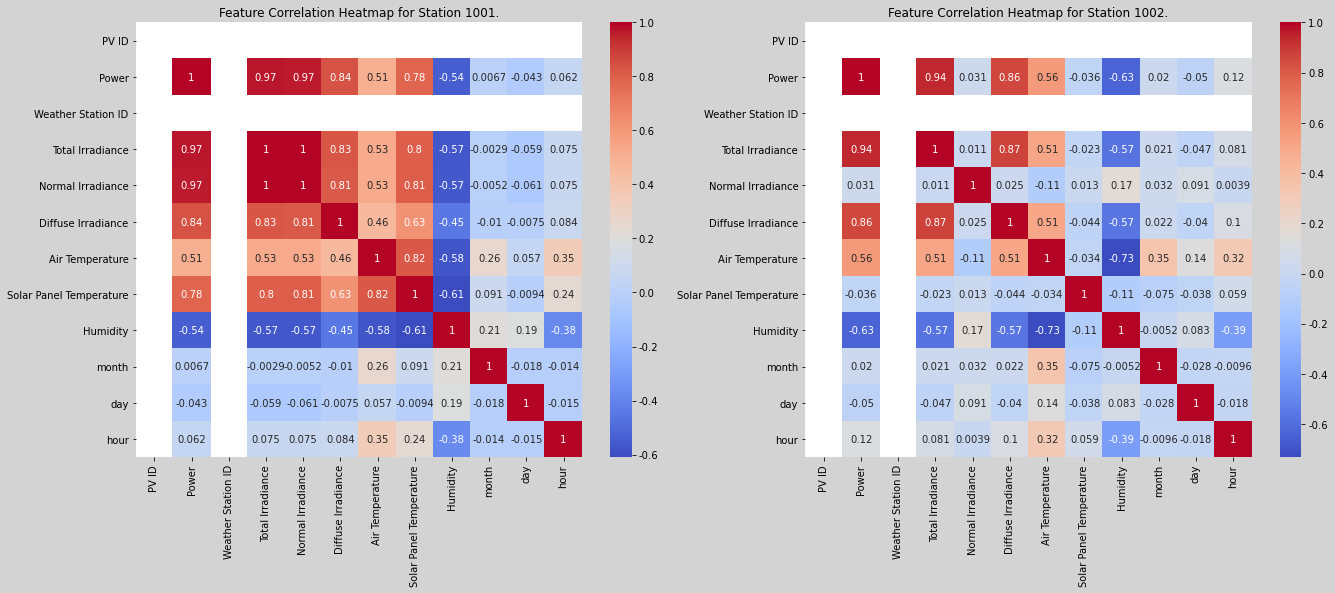

In [14]:
import seaborn as sns

# Calculate the feature correlation matrix for each photovoltaic power plant.
correlation_1001 = station_1001.corr()
correlation_1002 = station_1002.corr()


fig, axs = plt.subplots(1, 2, figsize=(22, 8))
fig.patch.set_facecolor('lightgrey')
# Plot the feature correlation heatmap for Photovoltaic Power Plant 1001
sns.heatmap(correlation_1001, annot=True, cmap='coolwarm', ax=axs[0])
axs[0].set_title('Feature Correlation Heatmap for Station 1001.')

# Plot the feature correlation heatmap for Photovoltaic Power Plant 1002
sns.heatmap(correlation_1002, annot=True, cmap='coolwarm', ax=axs[1])
axs[1].set_title('Feature Correlation Heatmap for Station 1002.')


**1.The Positive Correlation Between Power and Irradiance Features**:  
The power output of both photovoltaic power plants shows a strong positive correlation with total irradiance, normal irradiance, and diffuse irradiance. This indicates that the output power of the photovoltaic power plants is primarily influenced by solar irradiance, which aligns with the principles of photovoltaic power generation.  

**2.The Negative Correlation Between Humidity and Temperature/Irradiance**:  
Humidity exhibits a negative correlation with temperature and irradiance at both stations. Specifically, humidity tends to be lower when sunlight is strong, which conforms to actual climate variation patterns.  

**Conclusion**:  
When building models, irradiance features should be prioritized as key variables. Additionally, humidity should be handled appropriately to mitigate its negative impact on power fluctuations. These key features will help improve the accuracy of the model's power output predictions.


### 3. Build a Random Forest model to predict the photovoltaic power plant output for the next 4 hours.


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Moddel's R^2 : 0.92


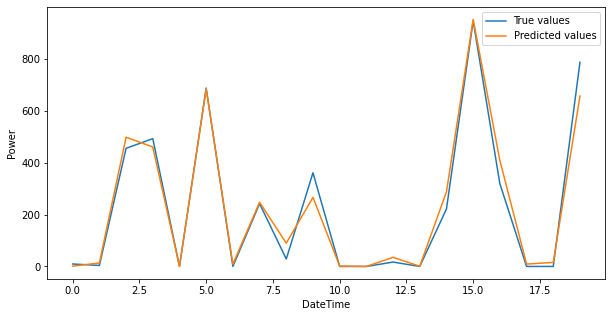

In [16]:
import pandas as pd

# Create lag features and use power and climate data from the past 4 hours to predict future power output
for i in range(1, 5):
    df[f'Power_lag_{i}'] = df['Power'].shift(i)
    df[f'Total Irradiance_lag_{i}'] = df['Total Irradiance'].shift(i)
    df[f'Normal Irradiance_lag_{i}'] = df['Normal Irradiance'].shift(i)
    df[f'Air Temperature_lag_{i}'] = df['Air Temperature'].shift(i)
    df[f'Humidity_lag_{i}'] = df['Humidity'].shift(i)

#Drop rows with missing values (caused by shift() generated NaNs).
df.dropna(inplace=True)
# Select features and target
X = df[[col for col in df.columns if 'lag' in col]]
y = df['Power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=100)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"Moddel's R^2 : {r2:.2f}")

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:20], label='True values')
plt.plot(y_pred[:20], label='Predicted values')
plt.xlabel('DateTime')
plt.ylabel('Power')
plt.legend()